In [89]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hk565\OneDrive\Documents\Project_DA\tmdb_5000_movies.csv")
print("Any missing values?:", df.isnull().values.any())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nRows with missing data:")
print(df[df.isnull().any(axis=1)])


Any missing values?: True

Missing values per column:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Rows with missing data:
         budget                                             genres  \
10    270000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
15    225000000  [{"id": 12, "name": "Adventure"}, {"id": 10751...   
24    207000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   
27    209000000  [{"id": 53, "name": "Thriller"}

In [90]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_date'] = df['release_date'].fillna(df['release_date'].min())
df['homepage'] = df['homepage'].fillna('Not Available')
df['overview'] = df['overview'].fillna('No Overview')
df['runtime'] = df['runtime'].fillna(df['runtime'].median())
df['tagline'] = df['tagline'].fillna('No Tagline')
print("\nMissing values per column after filling:")
print(df.isnull().sum())



Missing values per column after filling:
budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [91]:
print("\nZero values count in 'revenue':", (df['revenue'] == 0).sum())
print("Zero values count in 'budget':", (df['budget'] == 0).sum())



Zero values count in 'revenue': 1427
Zero values count in 'budget': 1037


In [92]:
zero_revenue = (df_cleaned['revenue'] == 0).sum()
zero_budget = (df_cleaned['budget'] == 0).sum()

print(f"Zero values in 'revenue': {zero_revenue}")
print(f"Zero values in 'budget': {zero_budget}")


Zero values in 'revenue': 1427
Zero values in 'budget': 1037


In [93]:
import json
def extract_genre_names(genre_list):
    try:
        genres = json.loads(genre_list)  
        genre_names = [genre['name'] for genre in genres]
        return ', '.join(genre_names)
    except (TypeError, json.JSONDecodeError):
        return '' 
        
df.loc[:, 'genres'] = df['genres'].apply(extract_genre_names)

print(df[['genres']].head())

print("\nAny missing values in 'genres' column?")
print(df['genres'].isnull().sum()) 


                                        genres
0  Action, Adventure, Fantasy, Science Fiction
1                   Adventure, Fantasy, Action
2                     Action, Adventure, Crime
3               Action, Crime, Drama, Thriller
4           Action, Adventure, Science Fiction

Any missing values in 'genres' column?
0


In [ ]:
print(df_cleaned.columns)

columns_to_drop = ['homepage', 'keywords', 'production_countries']
df_cleaned = df_cleaned.drop(columns=[col for col in columns_to_drop if col in df_cleaned.columns])


print(df_cleaned.columns)
df.to_csv(r"C:\Users\hk565\OneDrive\Documents\Project_DA\cleaned_movie_final_data.csv", index=False)

print("Data has been saved to 'cleaned_movie_data.csv'")


Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'sentiment_score', 'success_label', 'genres_list',
       'label'],
      dtype='object')
Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'sentiment_score', 'success_label', 'genres_list',
       'label'],
      dtype='object')
Data has been saved to 'cleaned_movie_data.csv'


In [95]:
!pip install nltk


In [96]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df_cleaned['sentiment_score'] = df_cleaned['overview'].fillna("").apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_movie(row, x=6):  
    if row['sentiment_score'] > 0:
        return 'Hit', row['sentiment_score']
    
    elif row['sentiment_score'] == 0:
        return 'Hit', row['sentiment_score']
    
    elif row['sentiment_score'] < 0:
        if row['revenue'] >= x * row['budget']:
            return 'Hit', abs(row['sentiment_score'])  #
            return 'Flop', row['sentiment_score']
    else:
        return 'Flop', row['sentiment_score']

df_cleaned[['success_label', 'sentiment_score']] = df_cleaned.apply(lambda row: pd.Series(classify_movie(row, x=3)), axis=1)

df_cleaned.to_csv("Latest.csv", index=False)

print(df_cleaned[['original_title', 'sentiment_score', 'revenue', 'budget', 'success_label']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hk565\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                             original_title  sentiment_score     revenue  \
0                                    Avatar           0.3612  2787965087   
1  Pirates of the Caribbean: At World's End           0.3919   961000000   
2                                   Spectre           0.8271   880674609   
3                     The Dark Knight Rises           0.9136  1084939099   
4                               John Carter          -0.7096   284139100   

      budget success_label  
0  237000000           Hit  
1  300000000           Hit  
2  245000000           Hit  
3  250000000           Hit  
4  260000000          Flop  


0


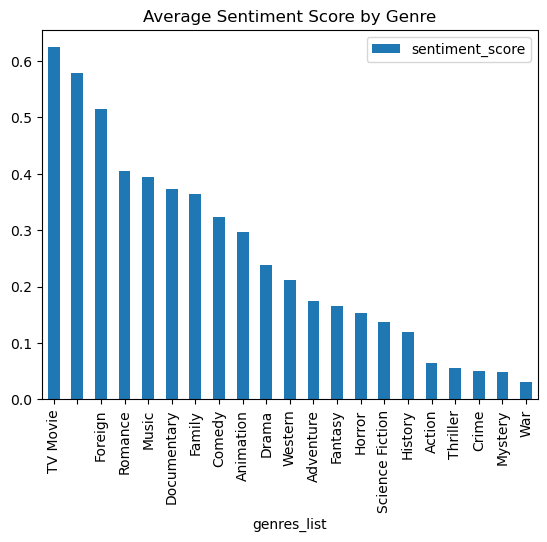

In [97]:
print(df_cleaned['genres'].isnull().sum())  

df_cleaned['genres'] = df_cleaned['genres'].fillna('')

df_cleaned['genres_list'] = df_cleaned['genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

genre_sentiment = df_cleaned.explode('genres_list')

genre_sentiment_summary = genre_sentiment.groupby('genres_list')['sentiment_score'].mean().reset_index()
genre_sentiment_summary = genre_sentiment_summary.sort_values(by='sentiment_score', ascending=False)

import matplotlib.pyplot as plt
genre_sentiment_summary.plot(kind='bar', x='genres_list', y='sentiment_score', title="Average Sentiment Score by Genre")
plt.show()


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

features = ['budget', 'popularity', 'runtime', 'sentiment_score']
X = df_cleaned[features]
y = df_cleaned['revenue']

X = X.fillna(0)
y = y.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.6950441767532998
RMSE: 89122941.63010663


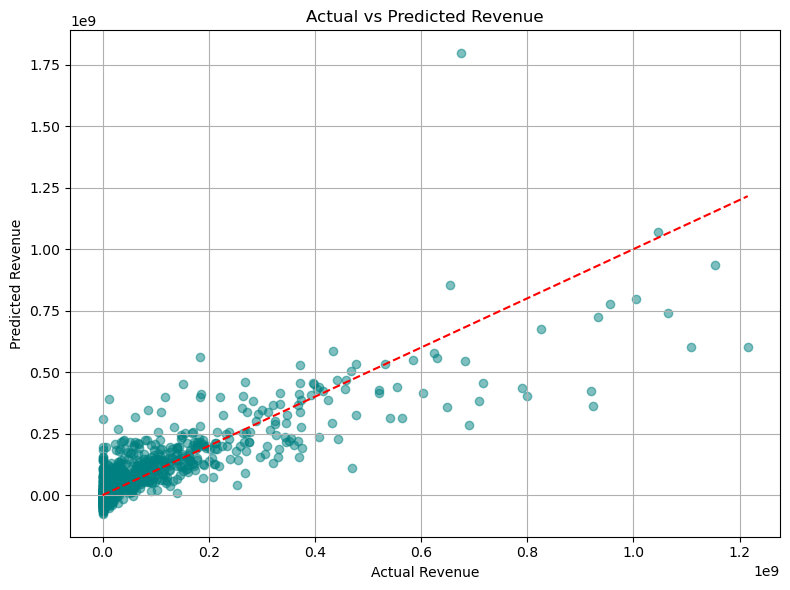

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


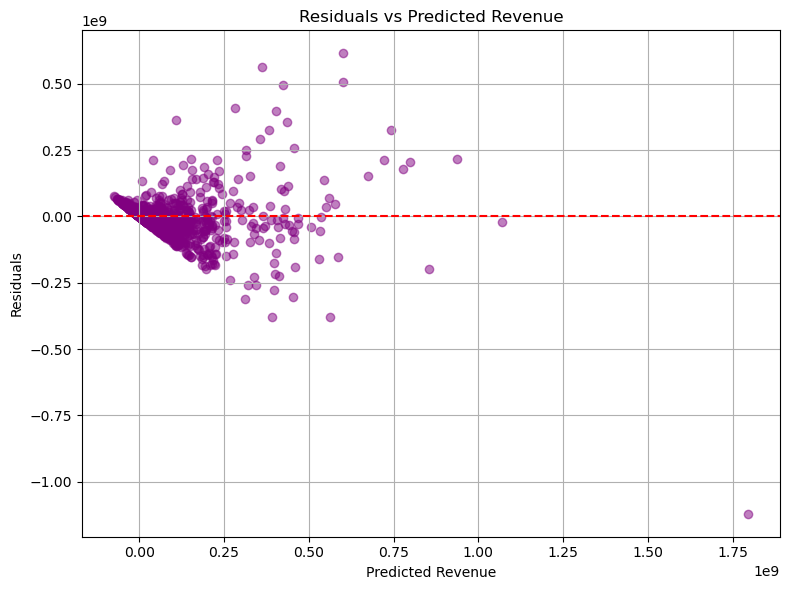

In [100]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


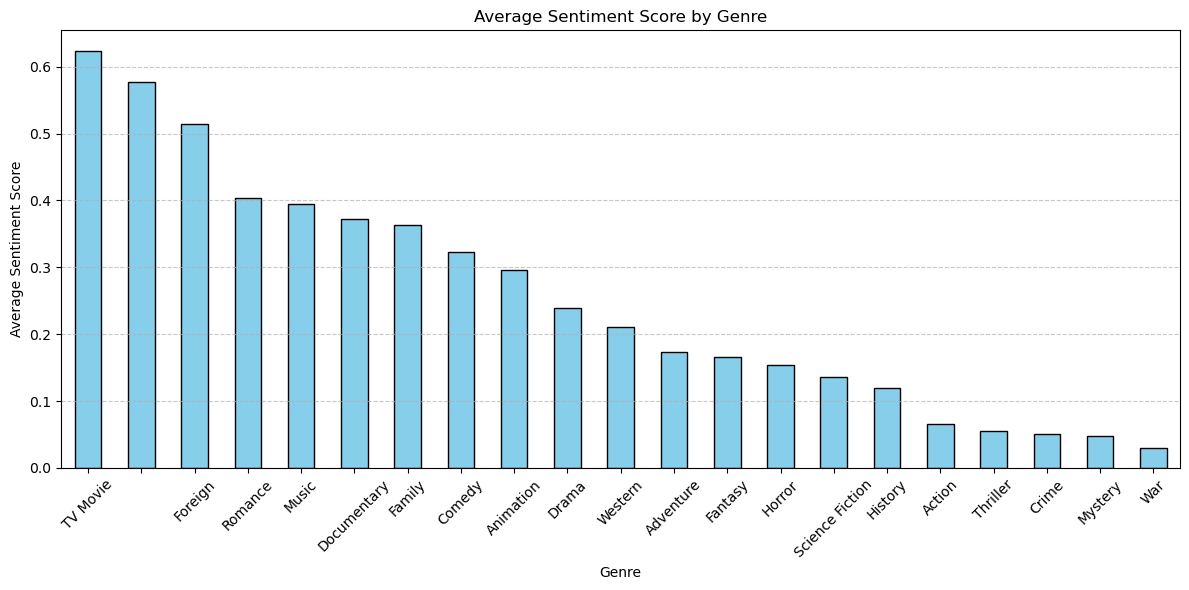

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned['genres'] = df_cleaned['genres'].fillna('')

df_cleaned['genres_list'] = df_cleaned['genres'].apply(lambda x: x.split(', '))

genre_sentiment = df_cleaned.explode('genres_list')

genre_avg_sentiment = genre_sentiment.groupby('genres_list')['sentiment_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_avg_sentiment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Sentiment Score by Genre")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



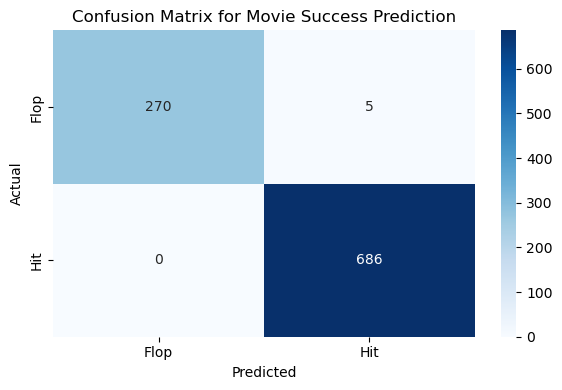

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


df_cleaned['label'] = df_cleaned['success_label'].map({'Hit': 1, 'Flop': 0})

features = ['budget', 'revenue', 'sentiment_score', 'runtime', 'popularity']
X = df_cleaned[features].fillna(0)
y = df_cleaned['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Flop', 'Hit'], yticklabels=['Flop', 'Hit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Movie Success Prediction')
plt.tight_layout()
plt.show()


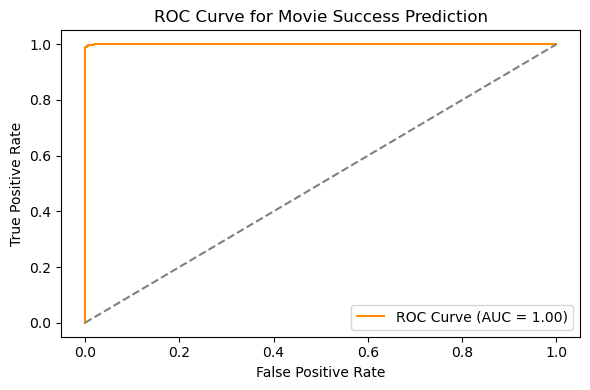

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Movie Success Prediction')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


C:\Users\hk565\AppData\Local\Temp\ipykernel_6444\1208374740.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')


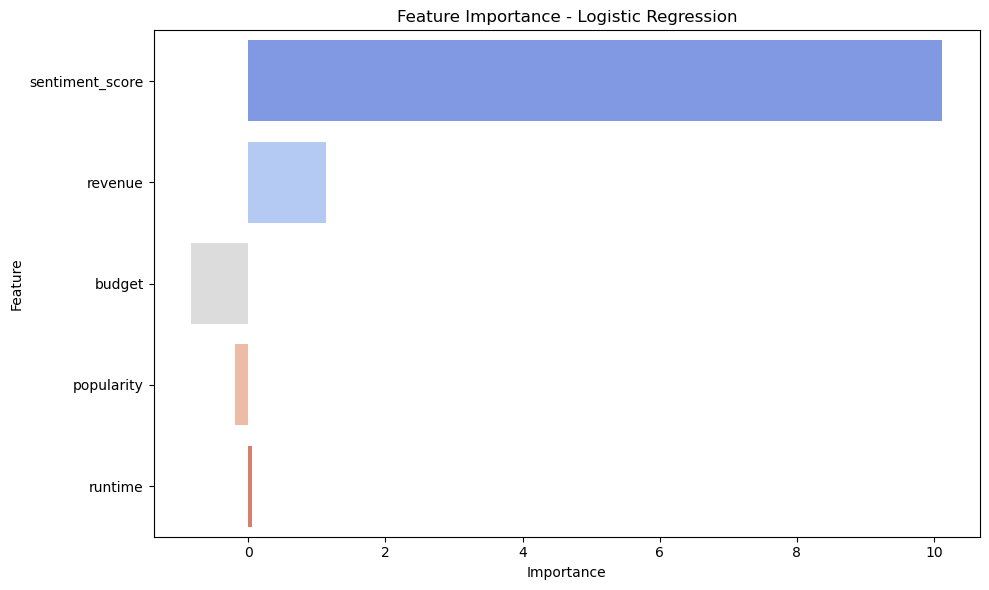

In [105]:

import seaborn as sns
coefficients = model.coef_[0]
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
}).sort_values(by='Importance', key=lambda x: abs(x), ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importance - Logistic Regression')
plt.tight_layout()
plt.show()
